<a href="https://colab.research.google.com/github/taniajasmin/Sentiment-Analysis/blob/main/Sentiment_Analysis_tool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 45.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

 Load the Sentiment Analysis Model

In [ ]:
from transformers import pipeline

sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


Create a Function for Sentiment Analysis

In [ ]:
def analyze_sentiment(text):
    if text.strip() == "":
        return "Please enter some text to analyze!"

    # Perform sentiment analysis
    result = sentiment_pipeline(text)[0]
    sentiment = result['label']
    confidence = result['score']

    return f"Sentiment: {sentiment}\nConfidence: {confidence:.2f}"

Add User Input and Display Results

In [ ]:
# Get user input
user_input = input("Enter some text to analyze: ")

# Analyze the sentiment and display the result
result = analyze_sentiment(user_input)
print(result)

Enter some text to analyze: I love that Book.
Sentiment: POSITIVE
Confidence: 1.00


Analyze Multiple Sentences

In [ ]:
def analyze_multiple_sentences(texts):
    results = sentiment_pipeline(texts)
    for i, result in enumerate(results):
        print(f"Text {i+1}: {result['label']} (Confidence: {result['score']:.2f})")

texts = [
    "I love this project!",
    "This is the worst experience ever.",
    "It's okay, not great."
]
analyze_multiple_sentences(texts)

Text 1: POSITIVE (Confidence: 1.00)
Text 2: NEGATIVE (Confidence: 1.00)
Text 3: NEGATIVE (Confidence: 0.98)


Visualize Sentiment Distribution

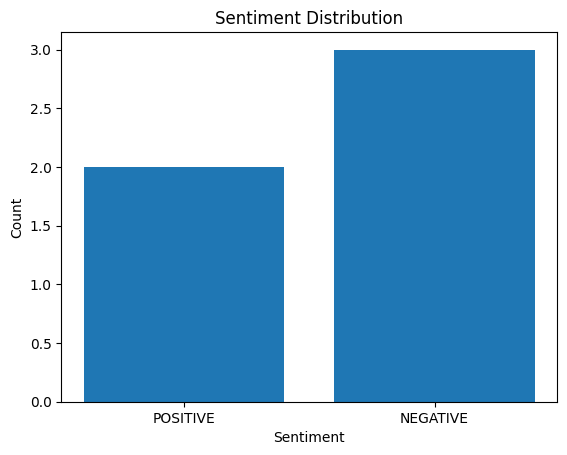

In [ ]:
import matplotlib.pyplot as plt

def visualize_sentiment(texts):
    results = sentiment_pipeline(texts)
    sentiments = [result['label'] for result in results]

    # Count the sentiments
    from collections import Counter
    sentiment_counts = Counter(sentiments)

    # Plot the results
    plt.bar(sentiment_counts.keys(), sentiment_counts.values())
    plt.title("Sentiment Distribution")
    plt.xlabel("Sentiment")
    plt.ylabel("Count")
    plt.show()

texts = [
    "I love this project!",
    "This is the worst experience ever.",
    "It's okay, not great.",
    "Absolutely fantastic!",
    "I'm feeling neutral about this."
]
visualize_sentiment(texts)

In [ ]:
# using pre-trained model

sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
!pip install transformers torch

In [ ]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

# Creating a function for sentiment analysis
def analyze_sentiment(text):
    if text.strip() == "":
        return "Please enter some text to analyze!"

    # Perform sentiment analysis
    result = sentiment_pipeline(text)[0]
    sentiment = result['label']
    confidence = result['score']

    return f"Sentiment: {sentiment}\nConfidence: {confidence:.2f}"

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


In [ ]:
# Get user input and display results
user_input = input("Enter some text to analyze: ")
result = analyze_sentiment(user_input)
print(result)

Enter some text to analyze: The lazy brown dog jumped over the fench.
Sentiment: NEGATIVE
Confidence: 0.99
